**Part1:** Main objective of the analysis that also specifies whether your model will be focused on a specific type of Time Series, Survival Anlaysis, or Deep Learning and the benefits that your analysis brings to the business or stakeholders of this data.

**Answer:** The primary objective of this assignment is to use deep learning model as a method for time series forecasting. I downloaded the dataset from the link: https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv. To get the best prediction accuracy, I tryed different smoothing approaches to reduct the noise and then build the model for the prediction. However, as these approaches failed to make prediction, I then used deep neural network based RNN and LSTM. I also tuned different hyper-parameters of this two models. 

The problem we are going to look at in this assignemnt is the International Airline Passengers prediction problem. Some benefits of this prediction process are as follows:

- More effective production scheduling.

- Cost reduction.

- Increased customer satisfaction. 


**Part2:** Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.

**Answer:** I will be using Airline Passengers's dataset for this assignment. This is a well-known data set that has 2 columns and 144 rows. Each row represent the total month wise pessagers from January, 1949 to December, 1960. 

The next few lines of codes show details about this dataset.

In [1]:
#read the downloaded data set
import pandas as pd
data=pd.read_csv('Data/airline-passengers.csv')
print(data.head())
print(data.tail())

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121
       Month  Passengers
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432


In [2]:
#make the column 'Month' as index
data.set_index('Month',inplace=True)
data.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [3]:
#print all index
print(data.index)

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)


In [4]:
#print the number of rows
print(data.shape[0])
#print the list of columns
print(data.columns.to_list())
#Information about the data
data.info()

144
['Passengers']
<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2+ KB


**Part3:** Brief summary of data exploration and actions taken for data cleaning or feature engineering.

Answer: Summary of data exploration are as follows:
- I checked the first few examples (rows) from the dataset to get an idea about the data.

- Checked the data type of each variable. It has data object and floating-point data. 

- There is no duplicate row in the data set.

- There is no 'NaN' and 'Infinity' component.

Actions taken for the data cleaning and feature engineering are as follows:
- I try to see the data nonstationary by time series and histogram. Both graph shows that the data is nonstationary.

- Test the data nonstationary by ADF test. ADF test return the test statistics and p-value. The more negative the value in test statistics, the more confident we can be that the series is stationary and vice-versa for positive vlaue. For lower p-value we may reject null hypothrsis. In our case, p-value is high. So, the data is nonstationary.

- We then apply different approach to  convert the data from nonstationary-to-stationary. Such as remove trend and seasonality.


In [5]:
#Chack the data duplicacy
data.duplicated()

Month
1949-01    False
1949-02    False
1949-03    False
1949-04    False
1949-05    False
           ...  
1960-08    False
1960-09    False
1960-10     True
1960-11    False
1960-12    False
Length: 144, dtype: bool

In [6]:
#check the null value
data.isnull().sum().sort_values()

Passengers    0
dtype: int64

In [7]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

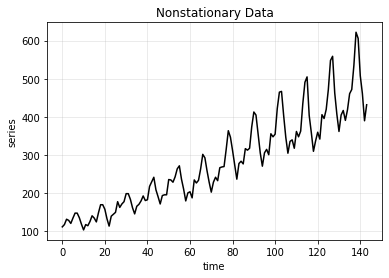

In [10]:
#draw the data(Nonstationary Data)
import numpy as np
import matplotlib.pyplot as plt
mytime = np.arange(144)
run_sequence_plot(mytime, data['Passengers'],
                  title="Nonstationary Data")

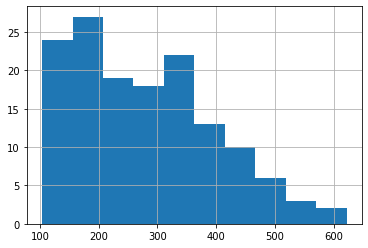

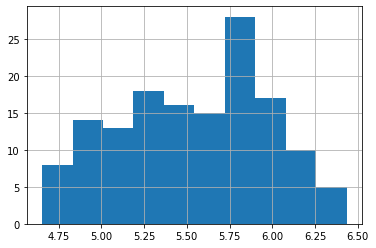

In [11]:
# histograms
pd.Series(data['Passengers']).hist()
plt.show()
pd.Series(np.log1p(data['Passengers'])).hist();

In [177]:
#ADF test
from statsmodels.tsa.stattools import adfuller
adf_b4, pvalue_b4, usedlag_, nobs_, critical_values_, icbest_ = adfuller(data['Passengers'])
print("ADF: ", adf_b4)
print("p-value: ", pvalue_b4)

ADF:  0.8153688792060528
p-value:  0.9918802434376411


In [13]:
#remove trend and seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
ss_decomposition = seasonal_decompose(x=data['Passengers'], model='additive', freq=12)
est_trend = ss_decomposition.trend
est_seasonal = ss_decomposition.seasonal
est_residual = ss_decomposition.resid

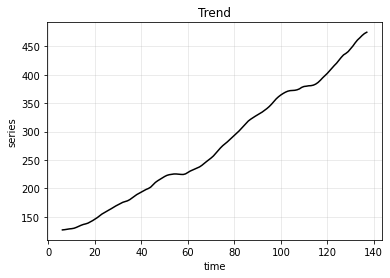

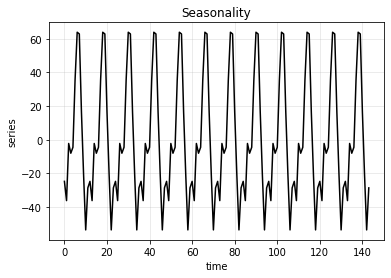

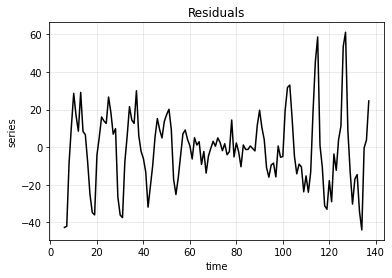

In [14]:
#draw the plot
run_sequence_plot(mytime, est_trend, title="Trend", ylabel="series")
plt.show()
run_sequence_plot(mytime, est_seasonal, title="Seasonality", ylabel="series")
plt.show()
run_sequence_plot(mytime, est_residual, title="Residuals", ylabel="series")

**Part4:** Summary of training at least three variations of the Time Series, Survival Analysis, or Deep Learning model you selected. For example, you can use different models or different hyperparameters.

**Answer:** Here I train three different models to smoothed and predict the time series:
- Model 1 (smoothing based approach): It is a process that often improve the model ability to forcas series by reducitng the impact of noice. Here, I used three expeoneital weighte moving average approaches: (i) single exponential, (ii) double exponential, and (iii) triple exponential. 
- Model 2 (SimpleRNN based approach): In this Model 2, I used the Simple RNN based approach. After 50 epoch of training the model has 22.69 training RMSE  and 55.39 test RMSE and perform better prediction than Model 1.

- Model 3 (LSTM based approach):In this Model 3, I used the LSTM based approach. After 100 epoch of training the model has 22.64 training RMSE  and 53.99 test RMSE and perform better prediction than both Model 1 and Model2.
 

In [15]:
#Normalize the data
from sklearn.preprocessing import MinMaxScaler
dataset = data['Passengers'].values
dataset = dataset.astype('float32')
dataset=dataset.reshape(-1,1)
#print(dataset)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [16]:
#seperate training and test set
from sklearn.model_selection import train_test_split
train,test=train_test_split(dataset,test_size=0.33,random_state=1234)
print(len(train), len(test))

96 48


**Single Exponential:**

In [18]:
# Train a model
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
single = SimpleExpSmoothing(train).fit(optimized=True)
single_preds = single.forecast(len(test))
single_mse = mean_squared_error(test, single_preds)
print("Predictions: ", single_preds)
print("MSE: ", single_mse)

Predictions:  [0.33184523 0.33184523 0.33184523 0.33184523 0.33184523 0.33184523
 0.33184523 0.33184523 0.33184523 0.33184523 0.33184523 0.33184523
 0.33184523 0.33184523 0.33184523 0.33184523 0.33184523 0.33184523
 0.33184523 0.33184523 0.33184523 0.33184523 0.33184523 0.33184523
 0.33184523 0.33184523 0.33184523 0.33184523 0.33184523 0.33184523
 0.33184523 0.33184523 0.33184523 0.33184523 0.33184523 0.33184523
 0.33184523 0.33184523 0.33184523 0.33184523 0.33184523 0.33184523
 0.33184523 0.33184523 0.33184523 0.33184523 0.33184523 0.33184523]
MSE:  0.058633761485962166


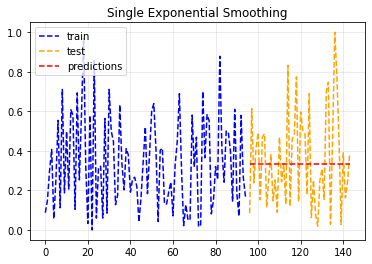

In [19]:
#plot the prediction
plt.plot(mytime[:-48], train, 'b--', label="train")
plt.plot(mytime[-48:], test, color='orange', linestyle="--", label="test")
plt.plot(mytime[-48:], single_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Single Exponential Smoothing")
plt.grid(alpha=0.3)

**Double Exponential:**

In [20]:
#Train the model
from statsmodels.tsa.api import Holt
double = Holt(train).fit(optimized=True)
double_preds = double.forecast(len(test))
double_mse = mean_squared_error(test, double_preds)
print("Predictions: ", double_preds)
print("MSE: ", double_mse)

Predictions:  [ 0.29024597  0.27757468  0.26490338  0.25223209  0.2395608   0.22688951
  0.21421821  0.20154692  0.18887563  0.17620434  0.16353304  0.15086175
  0.13819046  0.12551917  0.11284788  0.10017658  0.08750529  0.074834
  0.06216271  0.04949141  0.03682012  0.02414883  0.01147754 -0.00119376
 -0.01386505 -0.02653634 -0.03920763 -0.05187893 -0.06455022 -0.07722151
 -0.0898928  -0.1025641  -0.11523539 -0.12790668 -0.14057797 -0.15324927
 -0.16592056 -0.17859185 -0.19126314 -0.20393443 -0.21660573 -0.22927702
 -0.24194831 -0.2546196  -0.2672909  -0.27996219 -0.29263348 -0.30530477]
MSE:  0.2294154445016288


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


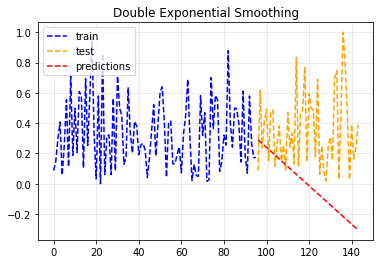

In [21]:
#Plot the prediction
plt.plot(mytime[:-48], train, 'b--', label="train")
plt.plot(mytime[-48:], test, color='orange', linestyle="--", label="test")
plt.plot(mytime[-48:], double_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Double Exponential Smoothing")
plt.grid(alpha=0.3)

**Triple Exponential:**

In [23]:
#Train the model
from statsmodels.tsa.api import ExponentialSmoothing

triple = ExponentialSmoothing(train,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=13).fit(optimized=True)
triple_preds = triple.forecast(len(test))
triple_mse = mean_squared_error(test, triple_preds)
print("Predictions: ", triple_preds)
print("MSE: ", triple_mse)

Predictions:  [0.38058961 0.34201974 0.19487894 0.37450926 0.34214968 0.43132374
 0.41477861 0.42036111 0.23324113 0.18798901 0.3546688  0.23566969
 0.45793093 0.38331193 0.34474206 0.19760126 0.37723158 0.344872
 0.43404605 0.41750093 0.42308343 0.23596345 0.19071132 0.35739112
 0.23839201 0.46065325 0.38603425 0.34746438 0.20032358 0.3799539
 0.34759432 0.43676837 0.42022325 0.42580575 0.23868577 0.19343364
 0.36011344 0.24111433 0.46337557 0.38875657 0.35018669 0.20304589
 0.38267622 0.35031664 0.43949069 0.42294557 0.42852807 0.24140809]
MSE:  0.07487543064670298


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


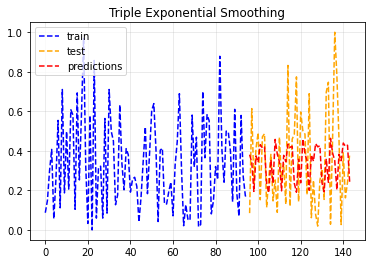

In [24]:
#Plot the prediction
plt.plot(mytime[:-48], train, 'b--', label="train")
plt.plot(mytime[-48:], test, color='orange', linestyle="--", label="test")
plt.plot(mytime[-48:], triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3);

RNN based approach:

Train Score: 22.59 RMSE
Test Score: 55.39 RMSE


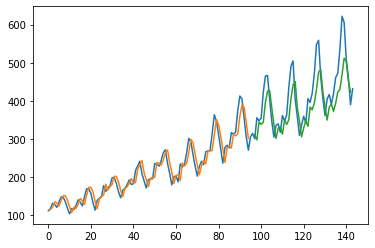

In [25]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('Data/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(SimpleRNN(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=0)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Train Score: 22.64 RMSE
Test Score: 53.99 RMSE


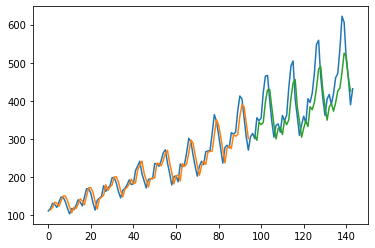

In [26]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('Data/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

**Part5:** A paragraph explaining which of your models you recommend as a final model that best fits your needs in terms of accuracy or explainability.

**Answer:** Here are my suggestions:
 - Use Model 1 if the focus on the model explaniablity. Here, triple exponential model perform better than others two. 

- Use Model 2 if the focus is on the accuracy as well as the model training time. 

- Use Model 3 if the focus is only the accuracy. 

**Part6:** Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.

**Answer:** All key finding of this assignment are as follows:

- We can use different approach to find the trend and seasonality 

- We can draw different types of graph to see the nonstationary in the dataset. We can also use hypothesis test such as ADF test.

- We can remove trend and seasonality to make the data stationaty.

- We can train three different models to smoothed and predict the time series such as smoothing or deep learning based approach.

**Part7:** Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.

**Answer:**  Here is the list of suggestions for the next steps in analyzing the data.

- To improve the accuracy and to remove the overfitting, we may tune the parameters of the deep neural network model.